# Seaborn
Matplotlib을 기반으로 하는 파이선 데이터 시각화 라이브러리

Matplotlib을 기반으로 다양한 색상테마와 통계용 차트 등의 기능을 추가하였음
## 주요파라미터


주요 파라미터 설명
- dataㅤ	데이터 구조 입력. 일반적으로 데이터프레임 객체
- x, yㅤ	x, y축의 값을 지정하는 변수
- data를 설정하지 않은 경우 리스트 등의 연속형 변수
- data를 설정한 경우 데이터프레임의 컬럼이름
- hue	데이터를 구분하기 위한 그룹화 변수(범주형 변수)
- data를 설정한 경우 데이터프레임의 컬럼이름
- sizeㅤ	너비가 다른 선을 생성하는 그룹화 변수 (마커의 경우, 마커의 크기가 다르게 나타남)
- styleㅤ	다른 스타일의 마커 또는 선을 생성하는 그룹화 변수
- paletteㅤ	색상 체계 선택
## #01. 기본준비



#### 패키지 참조


In [1]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

#### 그래프 전역 설정



In [2]:

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False

## #02. 기본 그래프

pie그래프는 제공되지 않음

### 1) 선 그래프


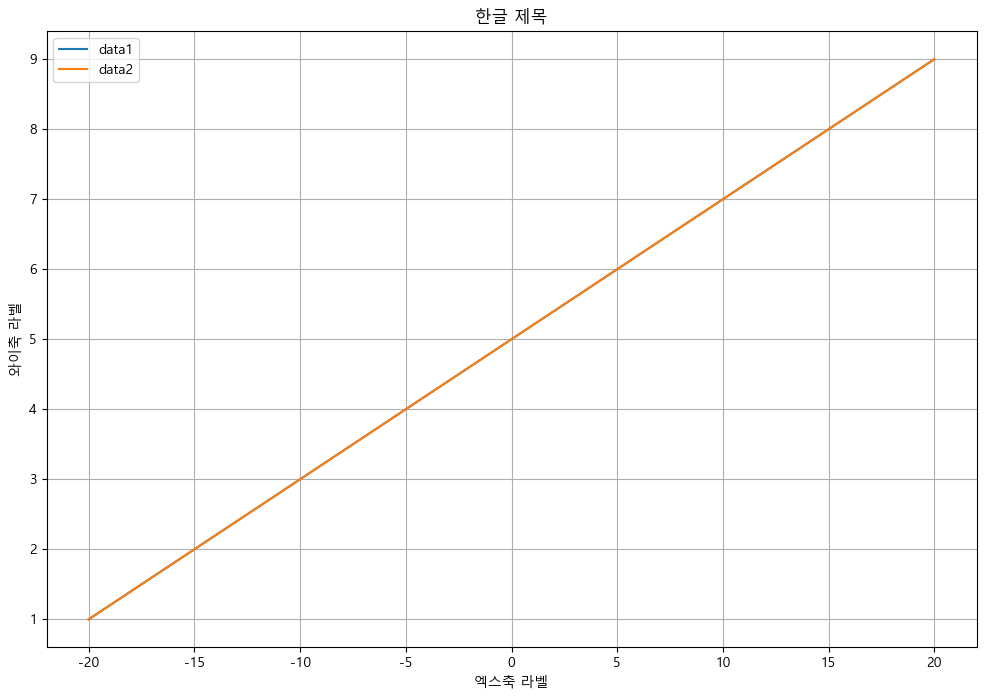

In [3]:
sb.lineplot(x=[-20, -10, 0, 10, 20], y=[1, 3, 5, 7, 9], label='data1')
sb.lineplot(x=[-20, -10, 0, 10, 20], y=[1, 3, 5, 7, 9], label='data2')


# 그 밖의 옵션은 matplotlib와 동일
plt.title('한글 제목')        # 그래프 제목
plt.xlabel("엑스축 라벨")      # x축 제목
plt.ylabel("와이축 라벨")      # y축 제목
plt.legend()
plt.grid()
plt.show()                  # 그래프 화면 표시
plt.close()                 # 그래프 그리기 종료



### 2) 세로 막대 그래프

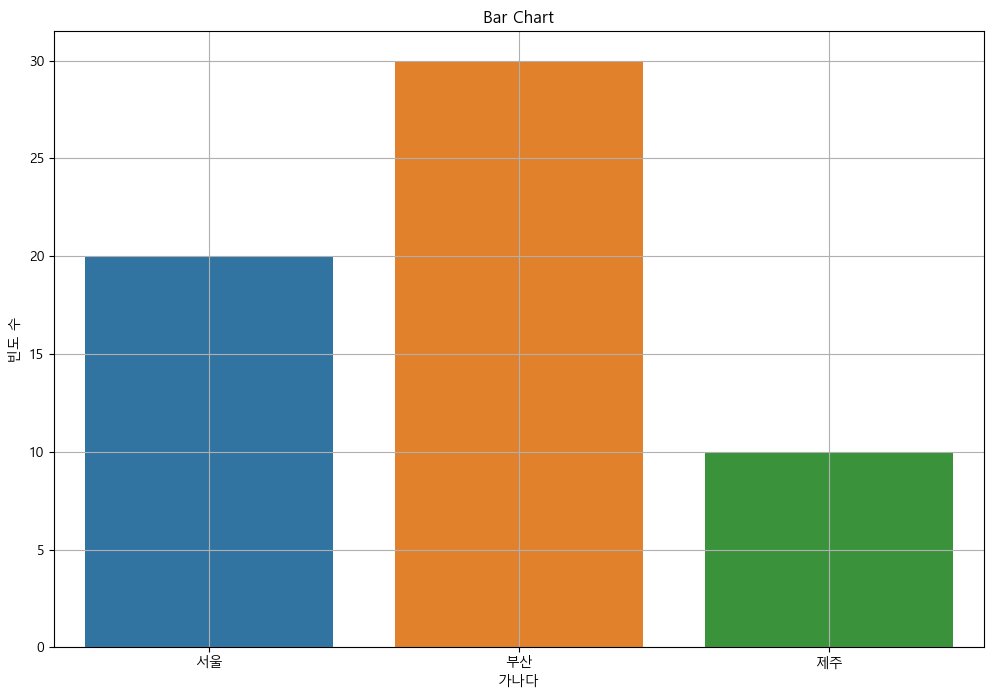

In [4]:
x = ["서울", "부산", "제주"]
y = [20, 30, 10]

sb.barplot(x=x,y=y)
plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

###  3) 가로 막대 그래프
기본 제공 팔레트

x축과 y축을 바꿔서 설정

> deep, muted, pastel, bright, dark, colorblind, Spectral


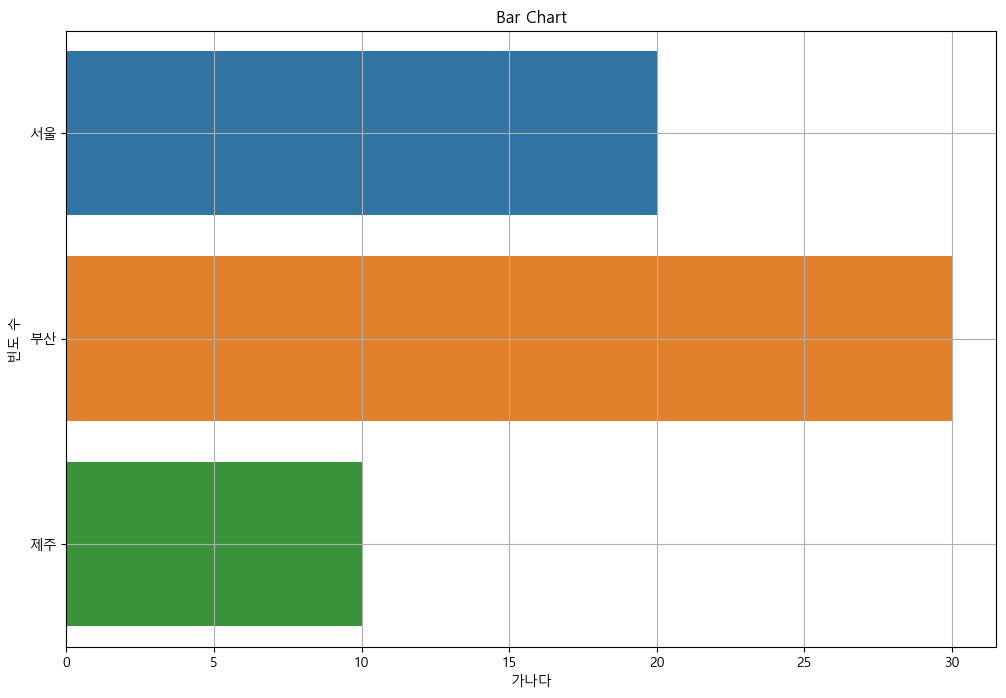

In [5]:
x = ["서울", "부산", "제주"]
y = [20, 30, 10]

sb.barplot(x=y,y=x)
plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

## #03. 데이터 프레임을 통한 그래프

### 1) 데이터 준비

In [6]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


### 2) 막대 그래프

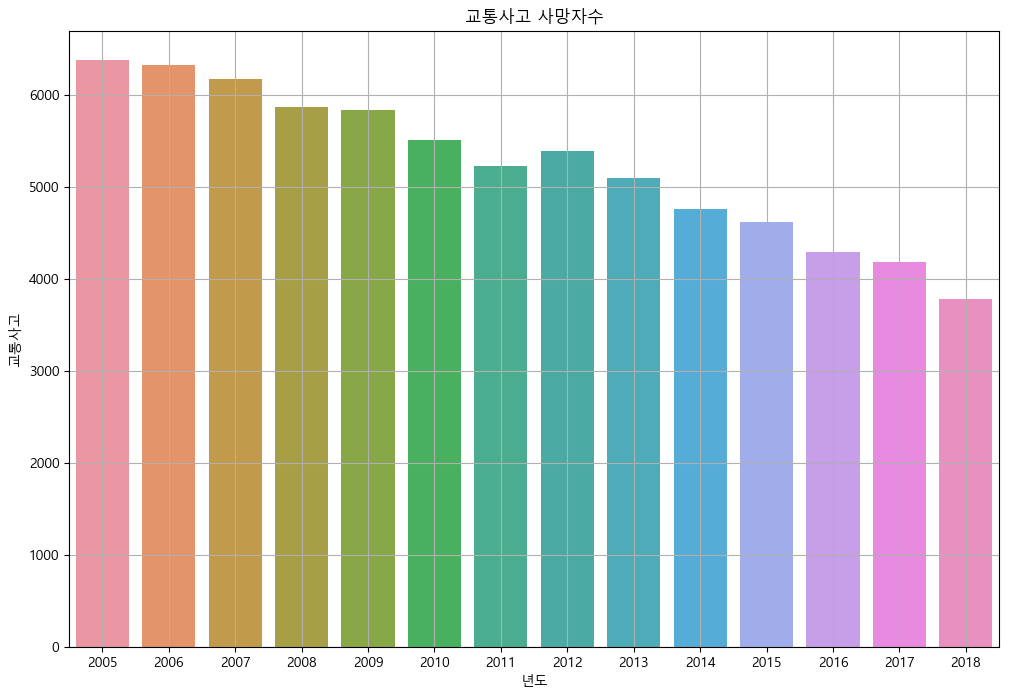

In [7]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x=df.index, y='사망자수')

plt.title('교통사고 사망자수')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

### 3) 산점도 그래프


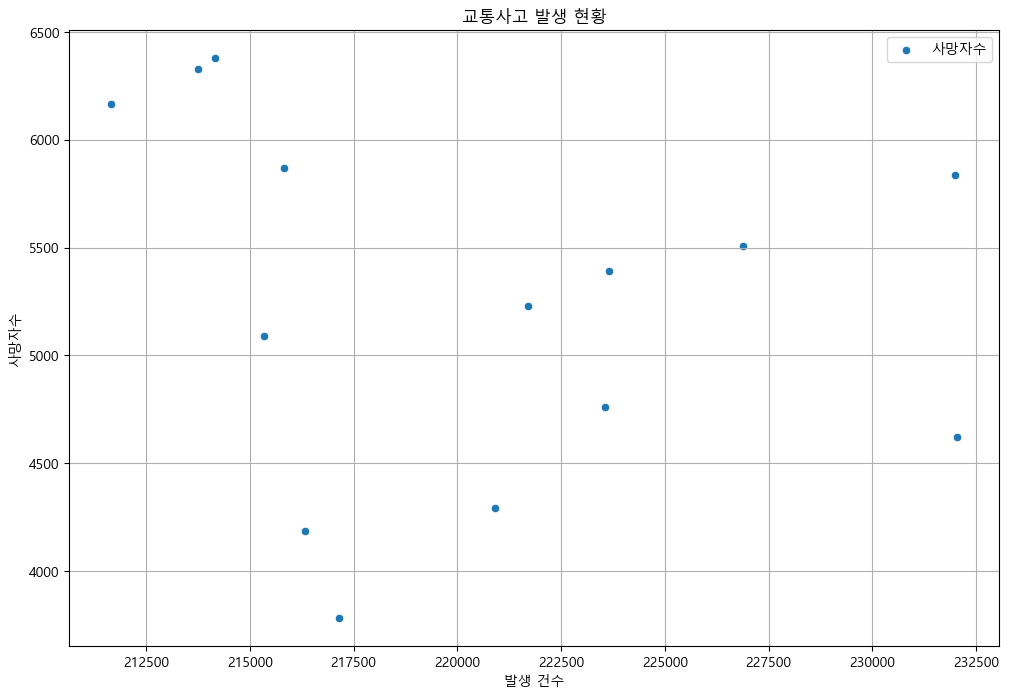

In [9]:

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)

sb.scatterplot(data=df,x='발생건수',y='사망자수',label='사망자수')
plt.title('교통사고 발생 현황')
plt.xlabel("발생 건수")
plt.ylabel("사망자수")
plt.legend()
plt.grid()
plt.show()
plt.close()

### 5) 추세선을 포함한 산점도 그래프

추세선 주변에 보이는 구간은 95% 신뢰구간임

fit_reg=False 를 추가하면 추세선이 표시되지 않게 되어 scatterplot 메서드와 동일한 결과를 보여준다 (기본값 = True)

ci 파라미터는 신뢰수준을 설정. 디폴트는 95 

link_kws 는 선의 색상, scatter_kws 는 점의 색상


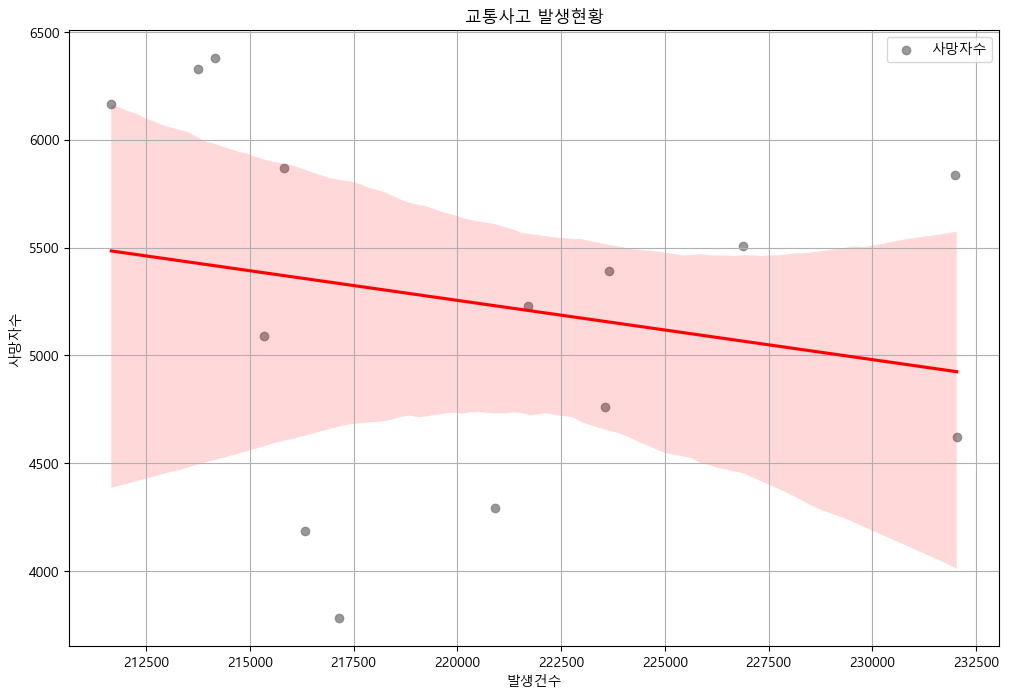

In [10]:
# 추세선을 함꼐 보여주는 산점도 그래프 그리기
sb.regplot(data=df,x='발생건수',y='사망자수',label='사망자수'
            ,line_kws={"color":"red"},scatter_kws={"color":"grey"} )

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")          # x축 제목
plt.ylabel("사망자수")          # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

### 5) 서브 플롯에 기반한 선 그래프

서브플롯을 사용하지 않을 떄는 sb.lineplot()함수에서 ax파라미터 제거



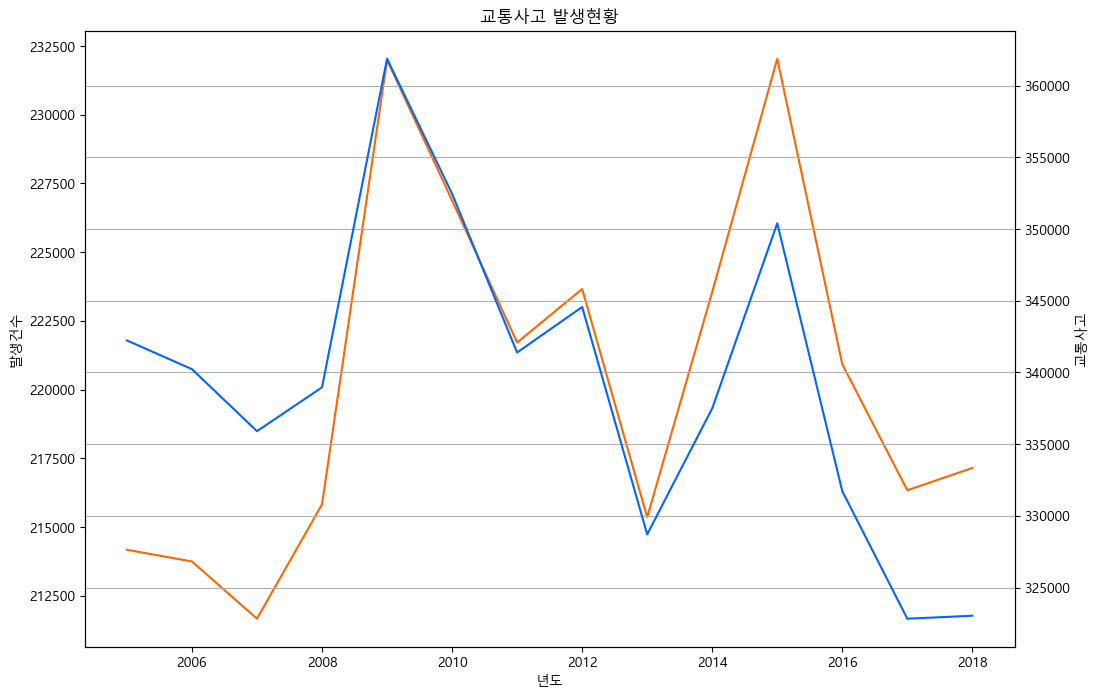

In [14]:
fig,ax1 = plt.subplots(1,1)
ax2=ax1.twinx()

# 그래프 그리기

sb.lineplot(data=df,x=df.index,y='발생건수',color="#ff6600",ax=ax1)
sb.lineplot(data=df,x=df.index,y="부상자수",color="#0066ff",ax=ax2)
plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료